#  ZTF

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

In [ ]:

df = pd.read_csv('/content/table_irsa_catalog_search_results.csv')

In [ ]:
df

,oid,ra,dec,field,ccdid,qid,filtercode,ngoodobs,ngoodobsrel,nobs,...,astrometricrms,chisq,magrms,maxmag,medianabsdev,medianmag,medmagerr,minmag,dist,angle
0,1727102200017670,297.706149,34.637366,1727,2,2,zg,76,51,80,...,6.964126e-07,1.120737,0.086244,19.52095,0.044413,19.32399,0.058753,19.00187,0.013397,191.623141
1,1727202200018065,297.706151,34.637375,1727,2,2,zr,84,50,87,...,4.423166e-07,1.373499,0.414690,18.68146,0.037714,18.42628,0.040710,16.17973,0.017387,8.769805
2,686311100032994,297.706142,34.637368,686,11,1,zi,98,96,162,...,3.039299e-07,0.711739,0.122518,18.16190,0.017866,18.09279,0.037216,16.97532,0.025531,251.939563
3,686211100033729,297.706146,34.637380,686,11,1,zr,914,899,1003,...,4.300797e-07,1.028713,0.229168,18.61024,0.025736,18.44029,0.037091,16.02310,0.037518,341.611614
4,686111100032155,297.706134,34.637385,686,11,1,zg,678,663,714,...,1.049343e-06,1.339229,0.220494,19.72642,0.055189,19.31252,0.061097,17.16516,0.073058,318.938806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,686311100079839,297.673059,34.642596,686,11,1,zi,98,96,160,...,7.465655e-07,1.930578,0.143087,19.52381,0.085061,19.12786,0.065323,18.79284,99.800233,280.874977
2797,1727202200168633,297.681784,34.656523,1727,2,2,zr,6,2,6,...,8.111919e-06,2.714422,0.364211,20.23182,0.148363,19.48517,0.081035,19.22416,99.807665,313.702733
2798,686311100078870,297.692562,34.662744,686,11,1,zi,8,8,14,...,1.539143e-06,0.265586,0.207164,21.38243,0.032648,21.07938,0.182254,20.64714,99.817131,336.228099
2799,686211100105869,297.673040,34.642647,686,11,1,zr,870,855,926,...,8.327908e-07,1.277016,0.109808,20.18485,0.068426,19.67999,0.079442,19.38905,99.890292,280.972526


In [ ]:
print("\nSummary Statistics:\n")
print(df.describe())



Summary Statistics:

                oid           ra          dec        field        ccdid  \
count  2.801000e+03  2801.000000  2801.000000  2801.000000  2801.000000   
mean   1.086840e+15   297.705698    34.637531  1086.641914     7.536237   
std    5.065692e+14     0.017184     0.013688   506.602325     4.379847   
min    6.861111e+14   297.672597    34.609701   686.000000     2.000000   
25%    6.862111e+14   297.691869    34.626827   686.000000     2.000000   
50%    6.863111e+14   297.705432    34.638302   686.000000    11.000000   
75%    1.727102e+15   297.719450    34.648159  1727.000000    11.000000   
max    1.727202e+15   297.739595    34.664949  1727.000000    11.000000   

               qid     ngoodobs  ngoodobsrel         nobs      nobsrel  ...  \
count  2801.000000  2801.000000  2801.000000  2801.000000  2801.000000  ...   
mean      1.384863   259.414495   246.913959   287.609425   275.108533  ...   
std       0.486650   313.710360   313.129630   333.782269   333.5

In [ ]:
df.head()

,oid,ra,dec,field,ccdid,qid,filtercode,ngoodobs,ngoodobsrel,nobs,...,astrometricrms,chisq,magrms,maxmag,medianabsdev,medianmag,medmagerr,minmag,dist,angle
0,1727102200017670,297.706149,34.637366,1727,2,2,zg,76,51,80,...,6.964126e-07,1.120737,0.086244,19.52095,0.044413,19.32399,0.058753,19.00187,0.013397,191.623141
1,1727202200018065,297.706151,34.637375,1727,2,2,zr,84,50,87,...,4.423166e-07,1.373499,0.414690,18.68146,0.037714,18.42628,0.040710,16.17973,0.017387,8.769805
2,686311100032994,297.706142,34.637368,686,11,1,zi,98,96,162,...,3.039299e-07,0.711739,0.122518,18.16190,0.017866,18.09279,0.037216,16.97532,0.025531,251.939563
3,686211100033729,297.706146,34.637380,686,11,1,zr,914,899,1003,...,4.300797e-07,1.028713,0.229168,18.61024,0.025736,18.44029,0.037091,16.02310,0.037518,341.611614
4,686111100032155,297.706134,34.637385,686,11,1,zg,678,663,714,...,1.049343e-06,1.339229,0.220494,19.72642,0.055189,19.31252,0.061097,17.16516,0.073058,318.938806


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/table_irsa_catalog_search_results.csv'  # Update the path
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading the file: {e}")

# Inspect for missing values
print("Dataset Information:\n")
df.info()
print("\nMissing Values per Column:\n", df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   oid             2801 non-null   int64  
 1   ra              2801 non-null   float64
 2   dec             2801 non-null   float64
 3   field           2801 non-null   int64  
 4   ccdid           2801 non-null   int64  
 5   qid             2801 non-null   int64  
 6   filtercode      2801 non-null   object 
 7   ngoodobs        2801 non-null   int64  
 8   ngoodobsrel     2801 non-null   int64  
 9   nobs            2801 non-null   int64  
 10  nobsrel         2801 non-null   int64  
 11  refmag          2801 non-null   float64
 12  refmagerr       2801 non-null   float64
 13  astrometricrms  2801 non-null   float64
 14  chisq           2757 non-null   float64
 15  magrms          2768 non-null   float64
 16  maxmag          2801 non-null   float64
 17  medianabsde

In [ ]:

# Handle missing values
missing_threshold = 0.05
missing_percentage = df.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
print(f"\nColumns with more than {missing_threshold*100}% missing values: {list(columns_to_drop)}")
df.drop(columns=columns_to_drop, inplace=True)

# Fill remaining missing values
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())




Columns with more than 5.0% missing values: []


# Perform EDA

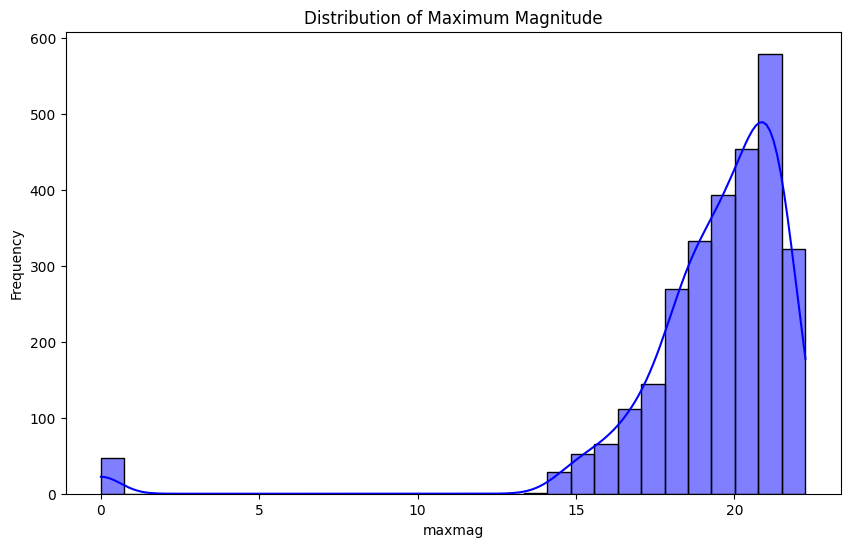

In [ ]:


# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['maxmag'], bins=30, kde=True, color='blue')
plt.title('Distribution of Maximum Magnitude')
plt.xlabel('maxmag')
plt.ylabel('Frequency')
plt.show()


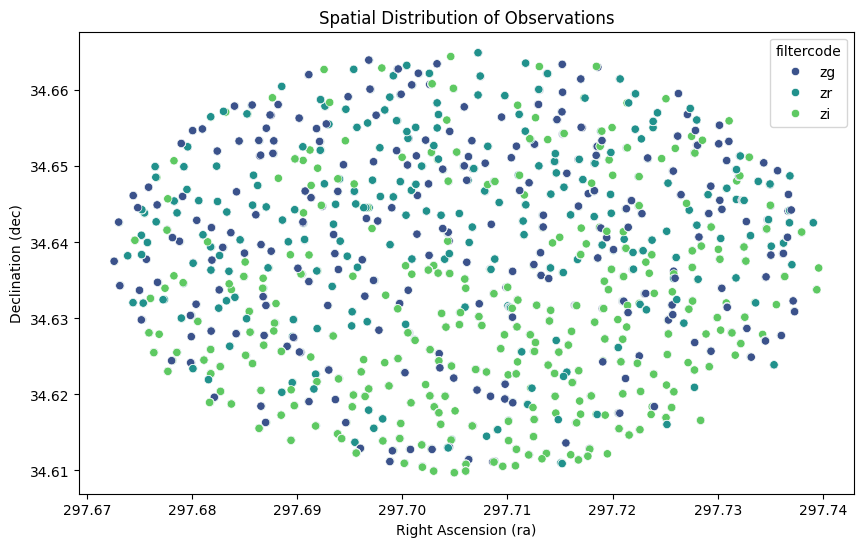

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ra', y='dec', data=df, hue='filtercode', palette='viridis')
plt.title('Spatial Distribution of Observations')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()



In [ ]:
# Feature Engineering
# Example: Magnitude range
if 'maxmag' in df.columns and 'minmag' in df.columns:
    df['magnitude_range'] = df['maxmag'] - df['minmag']

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Save cleaned and engineered dataset
output_path = 'cleaned_dataset.csv'  # Changed to save in the current directory
df.to_csv(output_path, index=False)
print(f"Cleaned and engineered dataset saved to {output_path}")



Cleaned and engineered dataset saved to cleaned_dataset.csv


In [ ]:
import pandas as pd

# Load the ZTF data from the CSV file
ztf_data = pd.read_csv('/content/table_irsa_catalog_search_results.csv')

# Define thresholds
good_obs_threshold = 10
total_obs_threshold = 15

# Function to classify detection
def classify_detection(row):
    if row['ngoodobs'] > good_obs_threshold and row['nobs'] > total_obs_threshold:
        return 'detect'
    else:
        return 'no detect'

# Apply the classification function to each row
ztf_data['detection'] = ztf_data.apply(classify_detection, axis=1)

# Display the classified data
print(ztf_data[['oid', 'ngoodobs', 'nobs', 'detection']])

                   oid  ngoodobs  nobs  detection
0     1727102200017670        76    80     detect
1     1727202200018065        84    87     detect
2      686311100032994        98   162     detect
3      686211100033729       914  1003     detect
4      686111100032155       678   714     detect
...                ...       ...   ...        ...
2796   686311100079839        98   160     detect
2797  1727202200168633         6     6  no detect
2798   686311100078870         8    14  no detect
2799   686211100105869       870   926     detect
2800   686111100126378       396   405     detect

[2801 rows x 4 columns]


detection
detect       2524
no detect     277
Name: count, dtype: int64


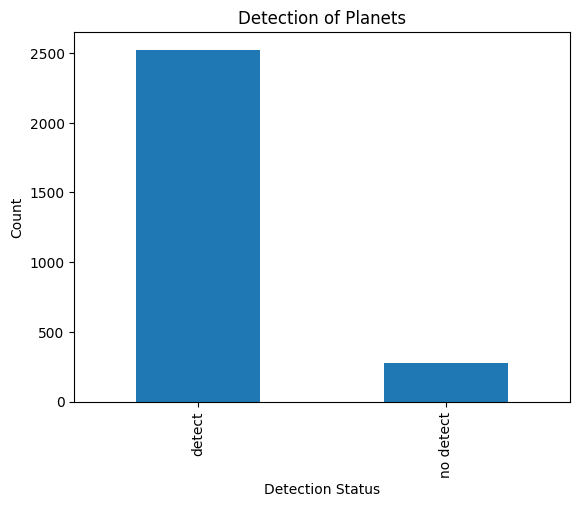

In [ ]:

detection_counts = ztf_data['detection'].value_counts()
print(detection_counts)

# Optionally, visualize the counts
import matplotlib.pyplot as plt

detection_counts.plot(kind='bar')
plt.title('Detection of Planets')
plt.xlabel('Detection Status')
plt.ylabel('Count')
plt.show()



Anomaly Detection Classification:
                   oid  ngoodobs  nobs    anomaly
0     1727102200017670        76    80  no detect
1     1727202200018065        84    87  no detect
2      686311100032994        98   162  no detect
3      686211100033729       914  1003  no detect
4      686111100032155       678   714  no detect
...                ...       ...   ...        ...
2796   686311100079839        98   160  no detect
2797  1727202200168633         6     6  no detect
2798   686311100078870         8    14  no detect
2799   686211100105869       870   926     detect
2800   686111100126378       396   405     detect

[2801 rows x 4 columns]


Text(0, 0.5, 'Total Observations')

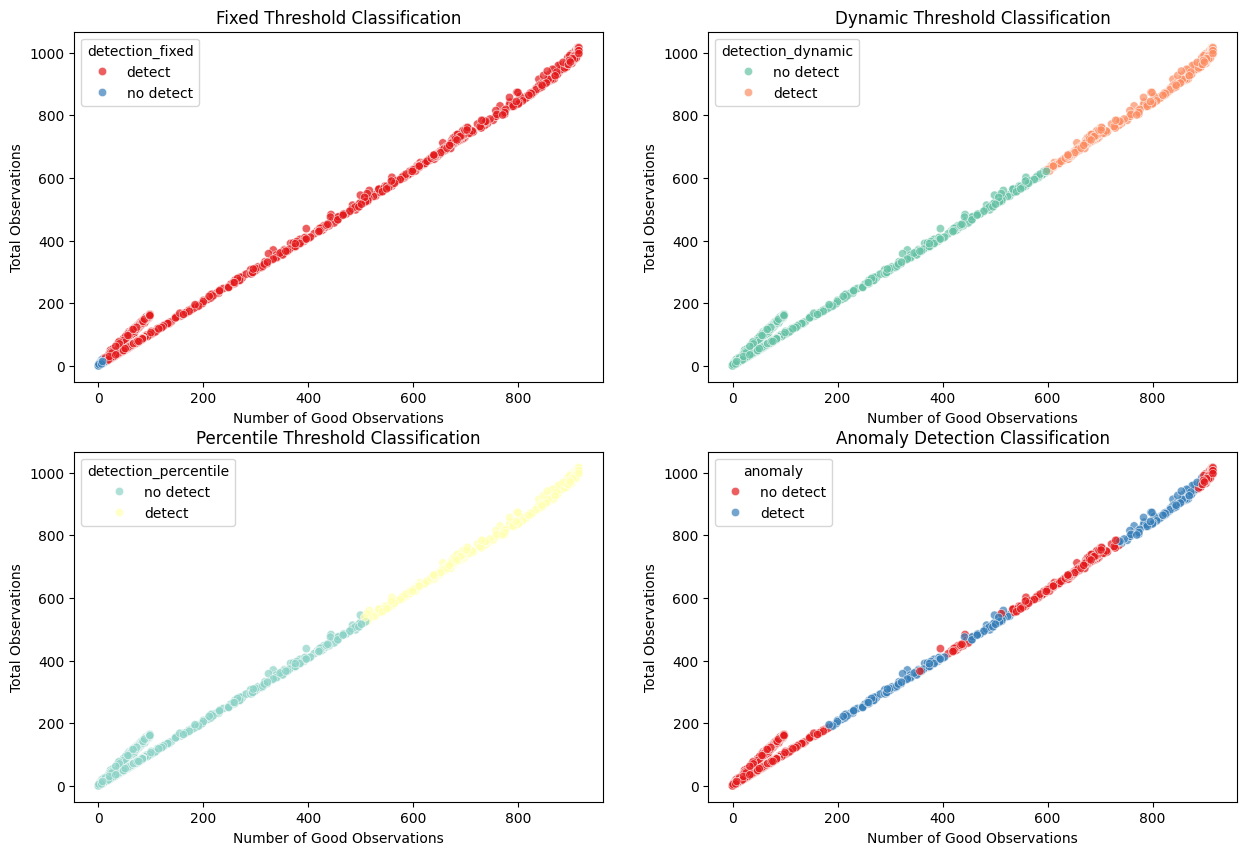

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the ZTF data from the CSV file
ztf_data = pd.read_csv('/content/table_irsa_catalog_search_results.csv')

# Define thresholds (fixed)
good_obs_threshold = 10
total_obs_threshold = 15

# Function to classify detection using fixed thresholds
def classify_detection_fixed(row):
    if row['ngoodobs'] > good_obs_threshold and row['nobs'] > total_obs_threshold:
        return 'detect'
    else:
        return 'no detect'

# Apply the fixed classification function to each row
ztf_data['detection_fixed'] = ztf_data.apply(classify_detection_fixed, axis=1)

# Dynamic Thresholding
mean_ngoodobs = ztf_data['ngoodobs'].mean()
std_ngoodobs = ztf_data['ngoodobs'].std()
mean_nobs = ztf_data['nobs'].mean()
std_nobs = ztf_data['nobs'].std()

good_obs_threshold_dynamic = mean_ngoodobs + std_ngoodobs
total_obs_threshold_dynamic = mean_nobs + std_nobs

# Function to classify detection using dynamic thresholds
def classify_detection_dynamic(row):
    if row['ngoodobs'] > good_obs_threshold_dynamic and row['nobs'] > total_obs_threshold_dynamic:
        return 'detect'
    else:
        return 'no detect'

# Apply the dynamic classification function to each row
ztf_data['detection_dynamic'] = ztf_data.apply(classify_detection_dynamic, axis=1)

# Percentile-based thresholds
good_obs_threshold_percentile = ztf_data['ngoodobs'].quantile(0.75)
total_obs_threshold_percentile = ztf_data['nobs'].quantile(0.75)

# Function to classify detection using percentile thresholds
def classify_detection_percentile(row):
    if row['ngoodobs'] > good_obs_threshold_percentile and row['nobs'] > total_obs_threshold_percentile:
        return 'detect'
    else:
        return 'no detect'

# Apply the percentile classification function to each row
ztf_data['detection_percentile'] = ztf_data.apply(classify_detection_percentile, axis=1)

# Machine Learning Classification
X = ztf_data[['ngoodobs', 'nobs']]
y = ztf_data['detection_fixed'].map({'detect': 1, 'no detect': 0})  # Convert to binary

# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Evaluate the model

# Anomaly Detection using Isolation Forest
anomaly_model = IsolationForest(contamination=0.1, random_state=42)
ztf_data['anomaly'] = anomaly_model.fit_predict(X)

# Map anomaly predictions to 'detect' and 'no detect'
ztf_data['anomaly'] = ztf_data['anomaly'].map({1: 'no detect', -1: 'detect'})

# Display the classified data using anomaly detection
print("\nAnomaly Detection Classification:")
print(ztf_data[['oid', 'ngoodobs', 'nobs', 'anomaly']])

# Plotting
plt.figure(figsize=(15, 10))

# Plot for fixed threshold classification
plt.subplot(2, 2, 1)
sns.scatterplot(data=ztf_data, x='ngoodobs', y='nobs', hue='detection_fixed', palette='Set1', alpha=0.7)
plt.title('Fixed Threshold Classification')
plt.xlabel('Number of Good Observations')
plt.ylabel('Total Observations')

# Plot for dynamic threshold classification
plt.subplot(2, 2, 2)
sns.scatterplot(data=ztf_data, x='ngoodobs', y='nobs', hue='detection_dynamic', palette='Set2', alpha=0.7)
plt.title('Dynamic Threshold Classification')
plt.xlabel('Number of Good Observations')
plt.ylabel('Total Observations')

# Plot for percentile threshold classification
plt.subplot(2, 2, 3)
sns.scatterplot(data=ztf_data, x='ngoodobs', y='nobs', hue='detection_percentile', palette='Set3', alpha=0.7)
plt.title('Percentile Threshold Classification')
plt.xlabel('Number of Good Observations')
plt.ylabel('Total Observations')

# Plot for anomaly detection classification
# Plot for anomaly detection classification
plt.subplot(2, 2, 4)
sns.scatterplot(data=ztf_data, x='ngoodobs', y='nobs', hue='anomaly', palette='Set1', alpha=0.7) # Changed palette to 'Set1'
plt.title('Anomaly Detection Classification')
plt.xlabel('Number of Good Observations')
plt.ylabel('Total Observations')

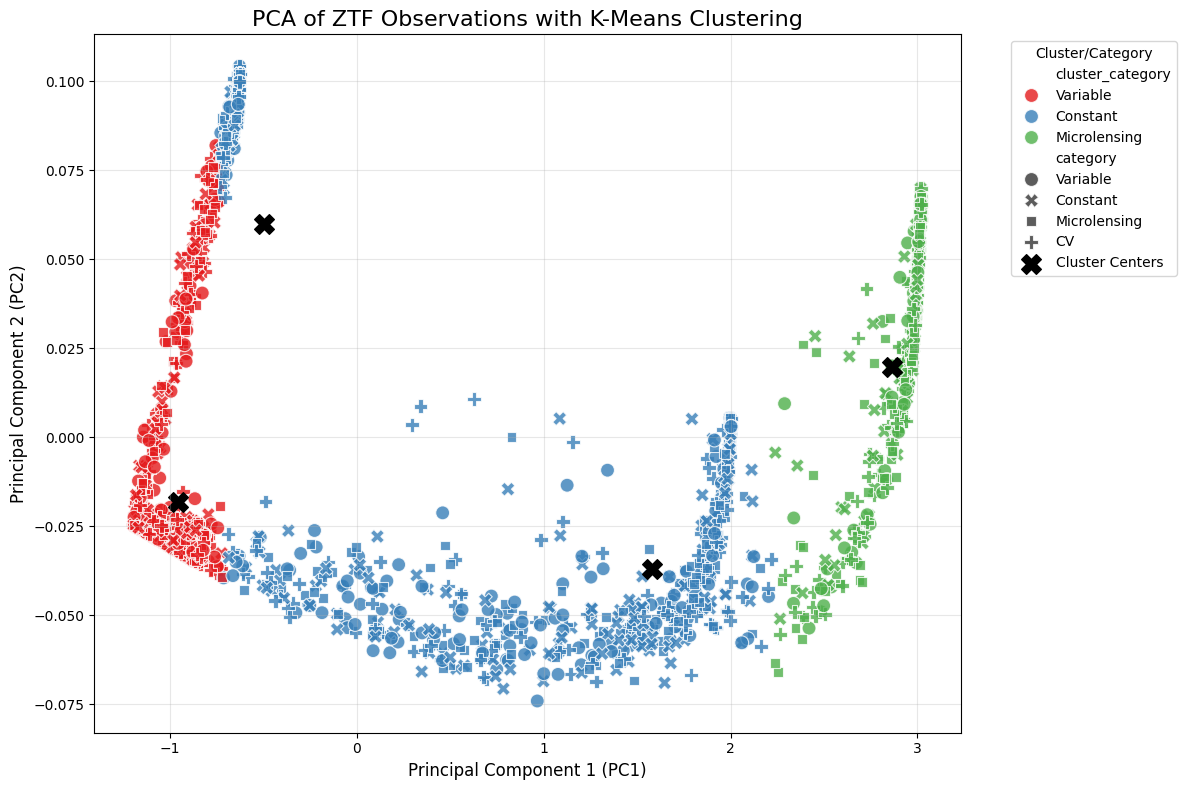

Explained variance by each principal component: [0.99876219 0.00123781]

Silhouette Scores by Category:
{'CV': 0.6130871105818498, 'Constant': 0.6101774297232925, 'Microlensing': 0.6068189473657539, 'Variable': 0.6138047860873859}

Davies-Bouldin Scores by Category:
{'CV': 0.6119380706232855, 'Constant': 0.5906678917552098, 'Microlensing': 0.6059575519127062, 'Variable': 0.5913467920466539}

Calinski-Harabasz Scores by Category:
{'CV': 7148.448500199621, 'Constant': 6730.97775034561, 'Microlensing': 7169.084072846399, 'Variable': 5891.847249463642}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load the ZTF data from the CSV file
ztf_data = pd.read_csv('/content/table_irsa_catalog_search_results.csv')

# Assume we have a 'category' column that contains the types of observations
ztf_data['category'] = pd.Series(['Variable', 'Constant', 'Microlensing', 'CV'] * (len(ztf_data) // 4))

# Filter the dataset for PCA
features = ztf_data[['ngoodobs', 'nobs']]  # Use these features for PCA
features = features.dropna()  # Drop rows with NaN values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['category'] = ztf_data['category'].iloc[features.index].values  # Add category

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(principal_components)

# Create a mapping from cluster to category based on majority vote
cluster_to_category = pca_df.groupby('cluster')['category'].agg(lambda x: x.mode()[0]).to_dict()
pca_df['cluster_category'] = pca_df['cluster'].map(cluster_to_category)

# Plotting the PCA results with enhanced clustering visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster_category',
    palette='Set1',  # Use a different palette for distinct colors
    style='category',
    s=100,
    alpha=0.8
)

# Annotate cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')
plt.title('PCA of ZTF Observations with K-Means Clustering', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Cluster/Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')

# Compute clustering metrics
category_groups = pca_df.groupby('category')
silhouette_scores = {}
davies_bouldin_scores = {}
calinski_harabasz_scores = {}

for category, group in category_groups:
    group_features = group[['PC1', 'PC2']]
    group_labels = group['cluster']

    if len(set(group_labels)) > 1:
        silhouette_scores[category] = silhouette_score(group_features, group_labels)
    else:
        silhouette_scores[category] = "Not Applicable (only one cluster)"

    davies_bouldin_scores[category] = davies_bouldin_score(group_features, group_labels)
    calinski_harabasz_scores[category] = calinski_harabasz_score(group_features, group_labels)

# Print metrics
print("\nSilhouette Scores by Category:")
print(silhouette_scores)

print("\nDavies-Bouldin Scores by Category:")
print(davies_bouldin_scores)

print("\nCalinski-Harabasz Scores by Category:")
print(calinski_harabasz_scores)

# Visualize clustering metrics with improved bar chart
metrics_df = pd.DataFrame({
    'Category': silhouette_scores.keys(),
    'Silhouette Score': [v if isinstance(v, float) else 0 for v in silhouette_scores.values()],
    'Davies-Bouldin Score': davies_bouldin_scores.values(),
    'Calinski-Harabasz Score': calinski_harabasz_scores.values()
})

metrics_df_melted = metrics_df.melt(id_vars='Category', var_name='Metric', value_name='Score')



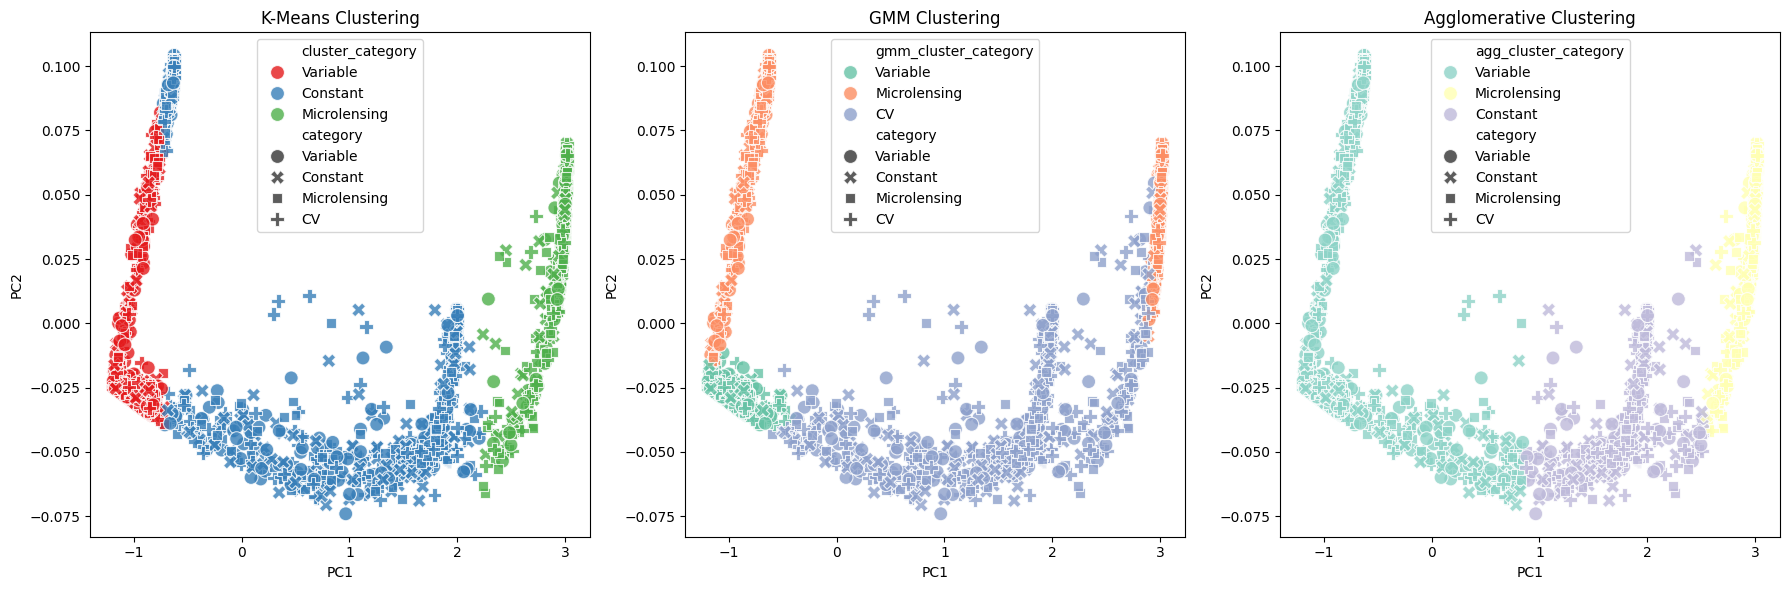


gmm_cluster - Silhouette Scores by Category:
{'CV': 0.3370014186535497, 'Constant': 0.3764561252987922, 'Microlensing': 0.3678095802592735, 'Variable': 0.3718496854269686}

gmm_cluster - Davies-Bouldin Scores by Category:
{'CV': 0.7804722733939202, 'Constant': 0.7426087740773143, 'Microlensing': 0.7700239916050968, 'Variable': 0.7431709902218745}

gmm_cluster - Calinski-Harabasz Scores by Category:
{'CV': 1893.1387775932126, 'Constant': 2064.4166819759266, 'Microlensing': 2155.017317426402, 'Variable': 1930.6760278521415}

agg_cluster - Silhouette Scores by Category:
{'CV': 0.7620913677740058, 'Constant': 0.7650242727284643, 'Microlensing': 0.775998585919043, 'Variable': 0.7479894216680334}

agg_cluster - Davies-Bouldin Scores by Category:
{'CV': 0.3512343248901145, 'Constant': 0.3876976107788407, 'Microlensing': 0.3726721238858175, 'Variable': 0.4213321596281817}

agg_cluster - Calinski-Harabasz Scores by Category:
{'CV': 8946.663390399384, 'Constant': 8416.553248656428, 'Microlensin

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=4, random_state=42)
pca_df['gmm_cluster'] = gmm.fit_predict(principal_components)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
pca_df['agg_cluster'] = agg_clustering.fit_predict(principal_components)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['dbscan_cluster'] = dbscan.fit_predict(principal_components)

# Create a mapping from cluster to category based on majority vote for each clustering method
for clustering_method in ['gmm_cluster', 'agg_cluster', 'dbscan_cluster']:
    cluster_to_category = pca_df.groupby(clustering_method)['category'].agg(lambda x: x.mode()[0]).to_dict()
    pca_df[f'{clustering_method}_category'] = pca_df[clustering_method].map(cluster_to_category)

# Visualize the clustering results for each method (using the first two principal components)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_category', palette='Set1', style='category', s=100, alpha=0.8, ax=axes[0])
axes[0].set_title('K-Means Clustering')

# GMM Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='gmm_cluster_category', palette='Set2', style='category', s=100, alpha=0.8, ax=axes[1])
axes[1].set_title('GMM Clustering')

# Agglomerative Clustering Plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='agg_cluster_category', palette='Set3', style='category', s=100, alpha=0.8, ax=axes[2])
axes[2].set_title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

# Compute clustering metrics for each clustering method
for clustering_method in ['gmm_cluster', 'agg_cluster', 'dbscan_cluster']:
    category_groups = pca_df.groupby('category')

    silhouette_scores = {}
    davies_bouldin_scores = {}
    calinski_harabasz_scores = {}

    for category, group in category_groups:
        group_features = group[['PC1', 'PC2']]
        group_labels = group[clustering_method]

        # Check for the number of unique labels before calculating metrics
        n_labels = len(set(group_labels))

        if n_labels > 1:  # Calculate metrics only if there are more than 1 unique label
            silhouette_scores[category] = silhouette_score(group_features, group_labels)
            davies_bouldin_scores[category] = davies_bouldin_score(group_features, group_labels)
            calinski_harabasz_scores[category] = calinski_harabasz_score(group_features, group_labels)
        else:
            silhouette_scores[category] = "Not Applicable (only one cluster)"
            davies_bouldin_scores[category] = "Not Applicable (only one cluster)"
            calinski_harabasz_scores[category] = "Not Applicable (only one cluster)"

    # Print metrics for the current clustering method
    print(f"\n{clustering_method} - Silhouette Scores by Category:")
    print(silhouette_scores)

    print(f"\n{clustering_method} - Davies-Bouldin Scores by Category:")
    print(davies_bouldin_scores)

    print(f"\n{clustering_method} - Calinski-Harabasz Scores by Category:")
    print(calinski_harabasz_scores)

    # Visualize clustering metrics with improved bar chart
    metrics_df = pd.DataFrame({
        'Category': silhouette_scores.keys(),
        'Silhouette Score': [v if isinstance(v, float) else 0 for v in silhouette_scores.values()],
        'Davies-Bouldin Score': davies_bouldin_scores.values(),
        'Calinski-Harabasz Score': calinski_harabasz_scores.values()
    })

    metrics_df_melted = metrics_df.melt(id_vars='Category', var_name='Metric', value_name='Score')



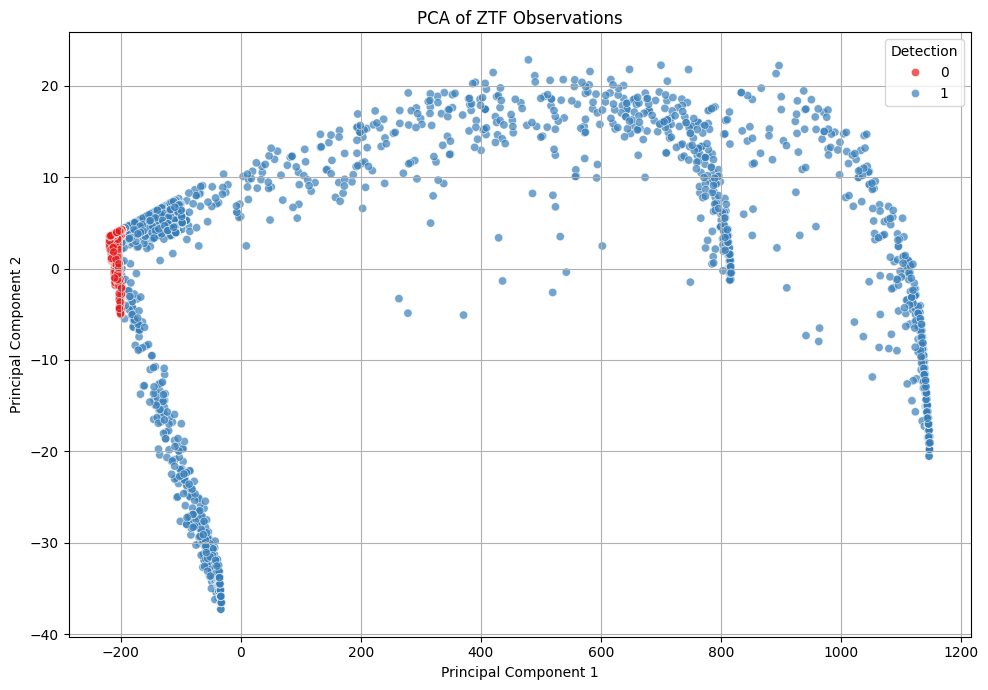

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import shap  # For SHAP values
import plotly.express as px  # For interactive plots

# Load the ZTF data from the CSV file
file_path = '/content/table_irsa_catalog_search_results.csv'
ztf_data = pd.read_csv(file_path)

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
ztf_data_imputed = pd.DataFrame(imputer.fit_transform(ztf_data.select_dtypes(include=[np.number])),
                                 columns=ztf_data.select_dtypes(include=[np.number]).columns)

# Feature Engineering: Create additional features
ztf_data_imputed['good_obs_ratio'] = ztf_data_imputed['ngoodobs'] / ztf_data_imputed['nobs']
ztf_data_imputed['magnitude_range'] = ztf_data_imputed['maxmag'] - ztf_data_imputed['minmag']

# Define thresholds for classification
good_obs_threshold = 10
total_obs_threshold = 15

# Function to classify detection
def classify_detection(row):
    if row['ngoodobs'] > good_obs_threshold and row['nobs'] > total_obs_threshold:
        return 'detect'
    else:
        return 'no detect'

# Apply classification function
ztf_data_imputed['detection'] = ztf_data_imputed.apply(classify_detection, axis=1) # Moved this line up

# Prepare data for modeling
X = ztf_data_imputed[['ngoodobs', 'nobs', 'good_obs_ratio', 'magnitude_range']]
y = ztf_data_imputed['detection'].map({'detect': 1, 'no detect': 0})

# Ensure X and y have no missing values before applying SMOTE
X = X.dropna()  # Drop rows with any missing values in X
y = y[X.index]  # Align y with the dropped rows in X

# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# SHAP values for model interpretation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_resampled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['detection'] = y_resampled

# Plotting PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='detection', palette='Set1', alpha=0.7)
plt.title('PCA of ZTF Observations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Detection')
plt.grid()
plt.tight_layout()
plt.show()

# Interactive plot using Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', color='detection', title='PCA of ZTF Observations (Interactive)',
                 labels={'detection': 'Detection Status', 'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})
fig.show()
